# 🧹 Phase 1 – Data Cleaning & EDA
**Objective:**  
Clean and preprocess employee and project datasets to ensure data quality and readiness for feature engineering.

---

## ✅ Steps:
1. Import Libraries & Load Data
2. Initial Data Exploration
3. Data Cleaning
4. Skill & Certification Normalization
5. Save Cleaned Datasets


In [8]:
# ================================================
# 1. Import Required Libraries
# ================================================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create output directories for plots
os.makedirs("../reports/eda_plots", exist_ok=True)
os.makedirs("../model", exist_ok=True)

# File paths (adjust as needed)
EMPLOYEE_MASTER_PATH = "../data/raw/employee_master.csv"
EMPLOYEE_EXP_PATH = "../data/raw/employee_experience.csv"
CLIENT_PROJECTS_PATH = "../data/raw/client_projects.csv"

print("✅ Libraries imported successfully!")
print("✅ Output directories created!")

✅ Libraries imported successfully!
✅ Output directories created!


In [9]:
# ================================================
# 2. Load Raw Datasets
# ================================================

def load_datasets():
    """
    Load all raw datasets with error handling
    Returns: tuple of dataframes (employee_master, employee_experience, client_projects)
    """
    try:
        df_emp = pd.read_csv(EMPLOYEE_MASTER_PATH)
        df_exp = pd.read_csv(EMPLOYEE_EXP_PATH)
        df_proj = pd.read_csv(CLIENT_PROJECTS_PATH)
        
        print("✅ All datasets loaded successfully!")
        return df_emp, df_exp, df_proj
        
    except FileNotFoundError as e:
        print(f"❌ Error loading datasets: {e}")
        return None, None, None

# Load datasets
df_emp, df_exp, df_proj = load_datasets()

# Display dataset shapes and basic info
print("\n📊 Dataset Overview:")
print("=" * 40)
print(f"Employee Master: {df_emp.shape} (rows, columns)")
print(f"Employee Experience: {df_exp.shape} (rows, columns)")
print(f"Client Projects: {df_proj.shape} (rows, columns)")

# Preview datasets
print("\n🔍 Data Preview:")
print("\n--- Employee Master ---")
display(df_emp.head())

print("\n--- Employee Experience ---")  
display(df_exp.head())

print("\n--- Client Projects ---")
display(df_proj.head())

✅ All datasets loaded successfully!

📊 Dataset Overview:
Employee Master: (1000, 6) (rows, columns)
Employee Experience: (1000, 2) (rows, columns)
Client Projects: (100, 6) (rows, columns)

🔍 Data Preview:

--- Employee Master ---


,Employee_ID,Name,Department,Years_Experience,Current_Project_ID,Location
0,E101,Mariah Brennan,AI Research,14.5,NaN,Pune
1,E102,Thomas Terry,DevOps,2.2,NaN,Pune
2,E103,Vanessa Jackson MD,Full Stack Dev,3.9,NaN,Mumbai
3,E104,Lori Sanchez,AI Research,8.3,NaN,Chennai
4,E105,Nicole Warner,Data Science,6.0,NaN,Mumbai



--- Employee Experience ---


,Employee_ID,Experience_Text
0,E101,"Worked on projects involving Azure, Blockchain..."
1,E102,"Worked on projects involving REST APIs, Data E..."
2,E103,Worked on projects involving Data Visualizatio...
3,E104,"Worked on projects involving GraphQL, Agile, a..."
4,E105,"Worked on projects involving Java, Azure, and ..."



--- Client Projects ---


,Project_ID,Client_Name,Project_Description,Required_Skills,Location,Status
0,P301,Byrd Ltd,Looking for expertise in SQL Database Manageme...,"SQL Database Management, Docker, NoSQL",Delhi,Closed
1,P302,"Cunningham, Anderson and Fernandez","Looking for expertise in Cloud Security, Conta...","Cloud Security, Container Orchestration, Python",Pune,Open
2,P303,"Mata, Mclean and Jones","Looking for expertise in React, Mobile Develop...","React, Mobile Development, Microservices Archi...",Mumbai,Closed
3,P304,Rodriguez-Dominguez,"Looking for expertise in Edge Computing, Jenki...","Edge Computing, Jenkins, IoT",Chennai,Closed
4,P305,Medina-Maldonado,"Looking for expertise in Terraform, SQL Databa...","Terraform, SQL Database Management, NLP",Mumbai,Open


📋 Missing Values Analysis:

Employee Master:
  Employee_ID: No missing values ✅
  Name: No missing values ✅
  Department: No missing values ✅
  Years_Experience: No missing values ✅
  Current_Project_ID: 1000 (100.0%)
  Location: No missing values ✅

Employee Experience:
  Employee_ID: No missing values ✅
  Experience_Text: No missing values ✅

Client Projects:
  Project_ID: No missing values ✅
  Client_Name: No missing values ✅
  Project_Description: No missing values ✅
  Required_Skills: No missing values ✅
  Location: No missing values ✅
  Status: No missing values ✅

📈 Statistical Summary (Years of Experience):
count    1000.000000
mean        8.130000
std         4.128511
min         1.000000
25%         4.400000
50%         8.400000
75%        11.700000
max        14.900000
Name: Years_Experience, dtype: float64

🏢 Departments (6 unique): ['AI Research', 'Cloud Engineering', 'Cybersecurity', 'Data Science', 'DevOps', 'Full Stack Dev']

🌍 Locations (4 unique): ['Chennai', 'Delhi',

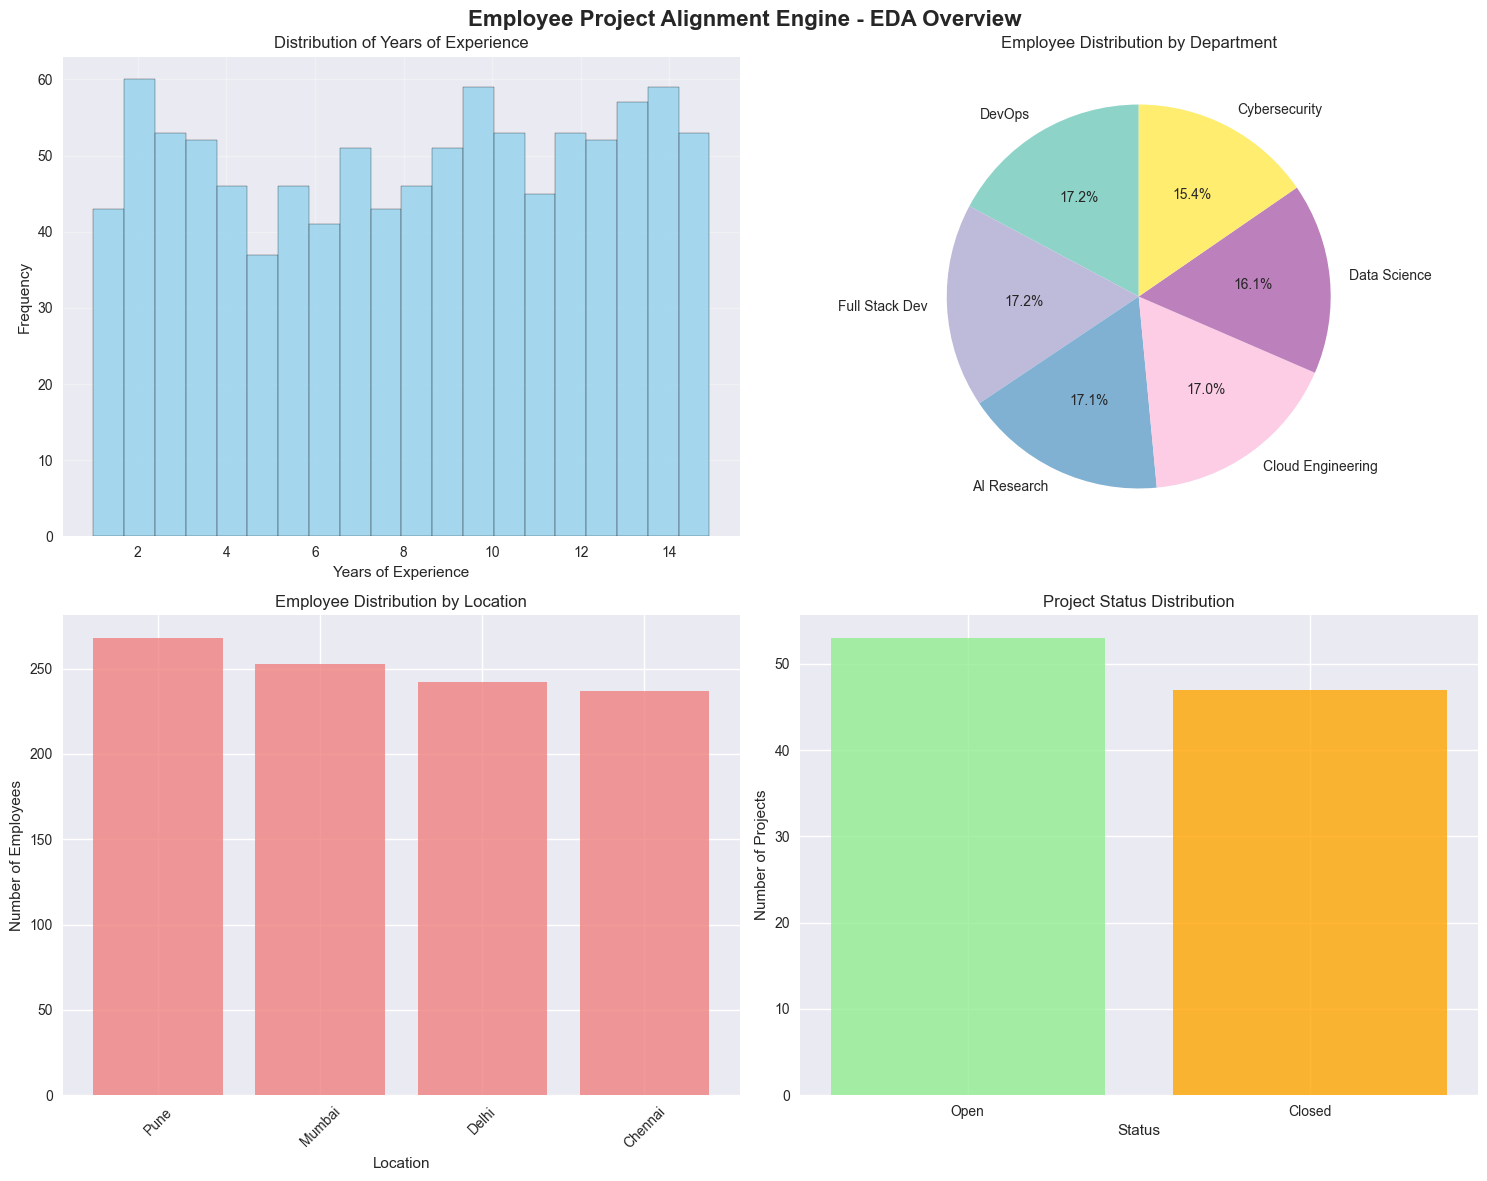


✅ EDA visualizations saved to ../reports/eda_plots/basic_overview.png


In [10]:
# ================================================
# 3. Comprehensive Exploratory Data Analysis (EDA)
# ================================================

def analyze_missing_values(dataframes, names):
    """Analyze and visualize missing values across datasets"""
    print("📋 Missing Values Analysis:")
    print("=" * 50)
    
    for df, name in zip(dataframes, names):
        missing = df.isnull().sum()
        missing_pct = (missing / len(df)) * 100
        
        print(f"\n{name}:")
        for col in df.columns:
            if missing[col] > 0:
                print(f"  {col}: {missing[col]} ({missing_pct[col]:.1f}%)")
            else:
                print(f"  {col}: No missing values ✅")

def create_basic_visualizations():
    """Create basic EDA visualizations"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle("Employee Project Alignment Engine - EDA Overview", fontsize=16, fontweight='bold')
    
    # 1. Years of Experience Distribution
    axes[0, 0].hist(df_emp['Years_Experience'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribution of Years of Experience')
    axes[0, 0].set_xlabel('Years of Experience')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Department Distribution
    dept_counts = df_emp['Department'].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(dept_counts)))
    axes[0, 1].pie(dept_counts.values, labels=dept_counts.index, autopct='%1.1f%%', 
                   colors=colors, startangle=90)
    axes[0, 1].set_title('Employee Distribution by Department')
    
    # 3. Location Distribution
    location_counts = df_emp['Location'].value_counts()
    axes[1, 0].bar(location_counts.index, location_counts.values, color='lightcoral', alpha=0.8)
    axes[1, 0].set_title('Employee Distribution by Location')
    axes[1, 0].set_xlabel('Location')
    axes[1, 0].set_ylabel('Number of Employees')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. Project Status Distribution
    status_counts = df_proj['Status'].value_counts()
    axes[1, 1].bar(status_counts.index, status_counts.values, 
                   color=['lightgreen', 'orange'], alpha=0.8)
    axes[1, 1].set_title('Project Status Distribution')
    axes[1, 1].set_xlabel('Status')
    axes[1, 1].set_ylabel('Number of Projects')
    
    plt.tight_layout()
    plt.savefig('../reports/eda_plots/basic_overview.png', dpi=300, bbox_inches='tight')
    plt.show()

# Perform missing values analysis
analyze_missing_values([df_emp, df_exp, df_proj], 
                      ['Employee Master', 'Employee Experience', 'Client Projects'])

# Basic statistical summary
print("\n📈 Statistical Summary (Years of Experience):")
print(df_emp['Years_Experience'].describe())

# Unique values analysis
print(f"\n🏢 Departments ({df_emp['Department'].nunique()} unique): {sorted(df_emp['Department'].unique())}")
print(f"\n🌍 Locations ({df_emp['Location'].nunique()} unique): {sorted(df_emp['Location'].unique())}")
print(f"\n📊 Project Status: {df_proj['Status'].value_counts().to_dict()}")

# Create visualizations
create_basic_visualizations()

print("\n✅ EDA visualizations saved to ../reports/eda_plots/basic_overview.png")

In [11]:
# ================================================
# 4. Advanced Data Cleaning & Normalization
# ================================================

def clean_employee_data(df):
    """
    Clean and normalize employee master data
    Args: df - employee dataframe
    Returns: cleaned dataframe
    """
    df_clean = df.copy()
    
    # Handle missing values and data types
    df_clean['Years_Experience'] = pd.to_numeric(df_clean['Years_Experience'], errors='coerce').fillna(0)
    
    # Remove unwanted columns
    columns_to_drop = ['Current_Project_ID', 'Name']
    df_clean = df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns])
    
    print("✅ Employee master data cleaned")
    return df_clean

def clean_experience_data(df):
    """
    Clean and normalize employee experience text data
    Args: df - experience dataframe  
    Returns: cleaned dataframe
    """
    df_clean = df.copy()
    
    # Text preprocessing
    df_clean['Experience_Text'] = (df_clean['Experience_Text']
                                   .astype(str)
                                   .str.lower()
                                   .str.strip())
    
    # Handle specific tech terms (e.g., .NET to Dot Net)
    df_clean['Experience_Text'] = df_clean['Experience_Text'].str.replace(
        r'\.net', 'dot net', case=False, regex=True
    )
    
    print("✅ Employee experience data cleaned")
    return df_clean

def clean_project_data(df):
    """
    Clean and normalize client project data
    Args: df - project dataframe
    Returns: cleaned dataframe
    """
    df_clean = df.copy()
    
    # Text preprocessing
    df_clean['Project_Description'] = (df_clean['Project_Description']
                                       .astype(str)
                                       .str.lower()
                                       .str.strip())
    
    # Normalize skills
    def normalize_skills(skill_str):
        """Normalize skills by lowering case, stripping spaces, and removing duplicates"""
        if pd.isna(skill_str):
            return ""
        skills = [s.strip().lower() for s in skill_str.split(",")]
        return ", ".join(sorted(set(skills)))
    
    df_clean['Required_Skills'] = df_clean['Required_Skills'].apply(normalize_skills)
    
    # Handle .NET in project skills
    df_clean['Required_Skills'] = df_clean['Required_Skills'].str.replace(
        r'\.net', 'dot net', case=False, regex=True
    )
    
    print("✅ Client project data cleaned")
    return df_clean

def validate_cleaned_data(df_emp, df_exp, df_proj):
    """Validate cleaned datasets"""
    print("\n🔍 Data Validation Results:")
    print("=" * 40)
    
    # Check for duplicates
    emp_duplicates = df_emp['Employee_ID'].duplicated().sum()
    exp_duplicates = df_exp['Employee_ID'].duplicated().sum()
    proj_duplicates = df_proj['Project_ID'].duplicated().sum()
    
    print(f"Employee ID duplicates: {emp_duplicates}")
    print(f"Experience ID duplicates: {exp_duplicates}")
    print(f"Project ID duplicates: {proj_duplicates}")
    
    # Check data integrity
    print(f"\nData Integrity:")
    print(f"Employees: {len(df_emp)} records")
    print(f"Experience records: {len(df_exp)} records")  
    print(f"Projects: {len(df_proj)} records")
    
    return emp_duplicates == 0 and exp_duplicates == 0 and proj_duplicates == 0

# Apply cleaning functions
print("🧹 Starting data cleaning process...")

df_emp_clean = clean_employee_data(df_emp)
df_exp_clean = clean_experience_data(df_exp)
df_proj_clean = clean_project_data(df_proj)

# Validate cleaned data
validation_passed = validate_cleaned_data(df_emp_clean, df_exp_clean, df_proj_clean)

if validation_passed:
    print("\n✅ All data validation checks passed!")
else:
    print("\n⚠️ Some validation checks failed. Please review the data.")

# Display cleaned data preview
print("\n📋 Cleaned Data Preview:")
print("\n--- Employee Master (Cleaned) ---")
print(df_emp_clean.head())

print("\n--- Employee Experience (Cleaned) ---")
print(df_exp_clean.head())

print("\n--- Client Projects (Cleaned) ---")
print(df_proj_clean.head())

🧹 Starting data cleaning process...
✅ Employee master data cleaned
✅ Employee experience data cleaned
✅ Client project data cleaned

🔍 Data Validation Results:
Employee ID duplicates: 0
Experience ID duplicates: 0
Project ID duplicates: 0

Data Integrity:
Employees: 1000 records
Experience records: 1000 records
Projects: 100 records

✅ All data validation checks passed!

📋 Cleaned Data Preview:

--- Employee Master (Cleaned) ---
  Employee_ID      Department  Years_Experience Location
0        E101     AI Research              14.5     Pune
1        E102          DevOps               2.2     Pune
2        E103  Full Stack Dev               3.9   Mumbai
3        E104     AI Research               8.3  Chennai
4        E105    Data Science               6.0   Mumbai

--- Employee Experience (Cleaned) ---
  Employee_ID                                    Experience_Text
0        E101  worked on projects involving azure, blockchain...
1        E102  worked on projects involving rest apis, d

🔍 Extracting skills from datasets...
📊 Found 58 unique skills in projects
📊 Found 24 unique skills in experience data


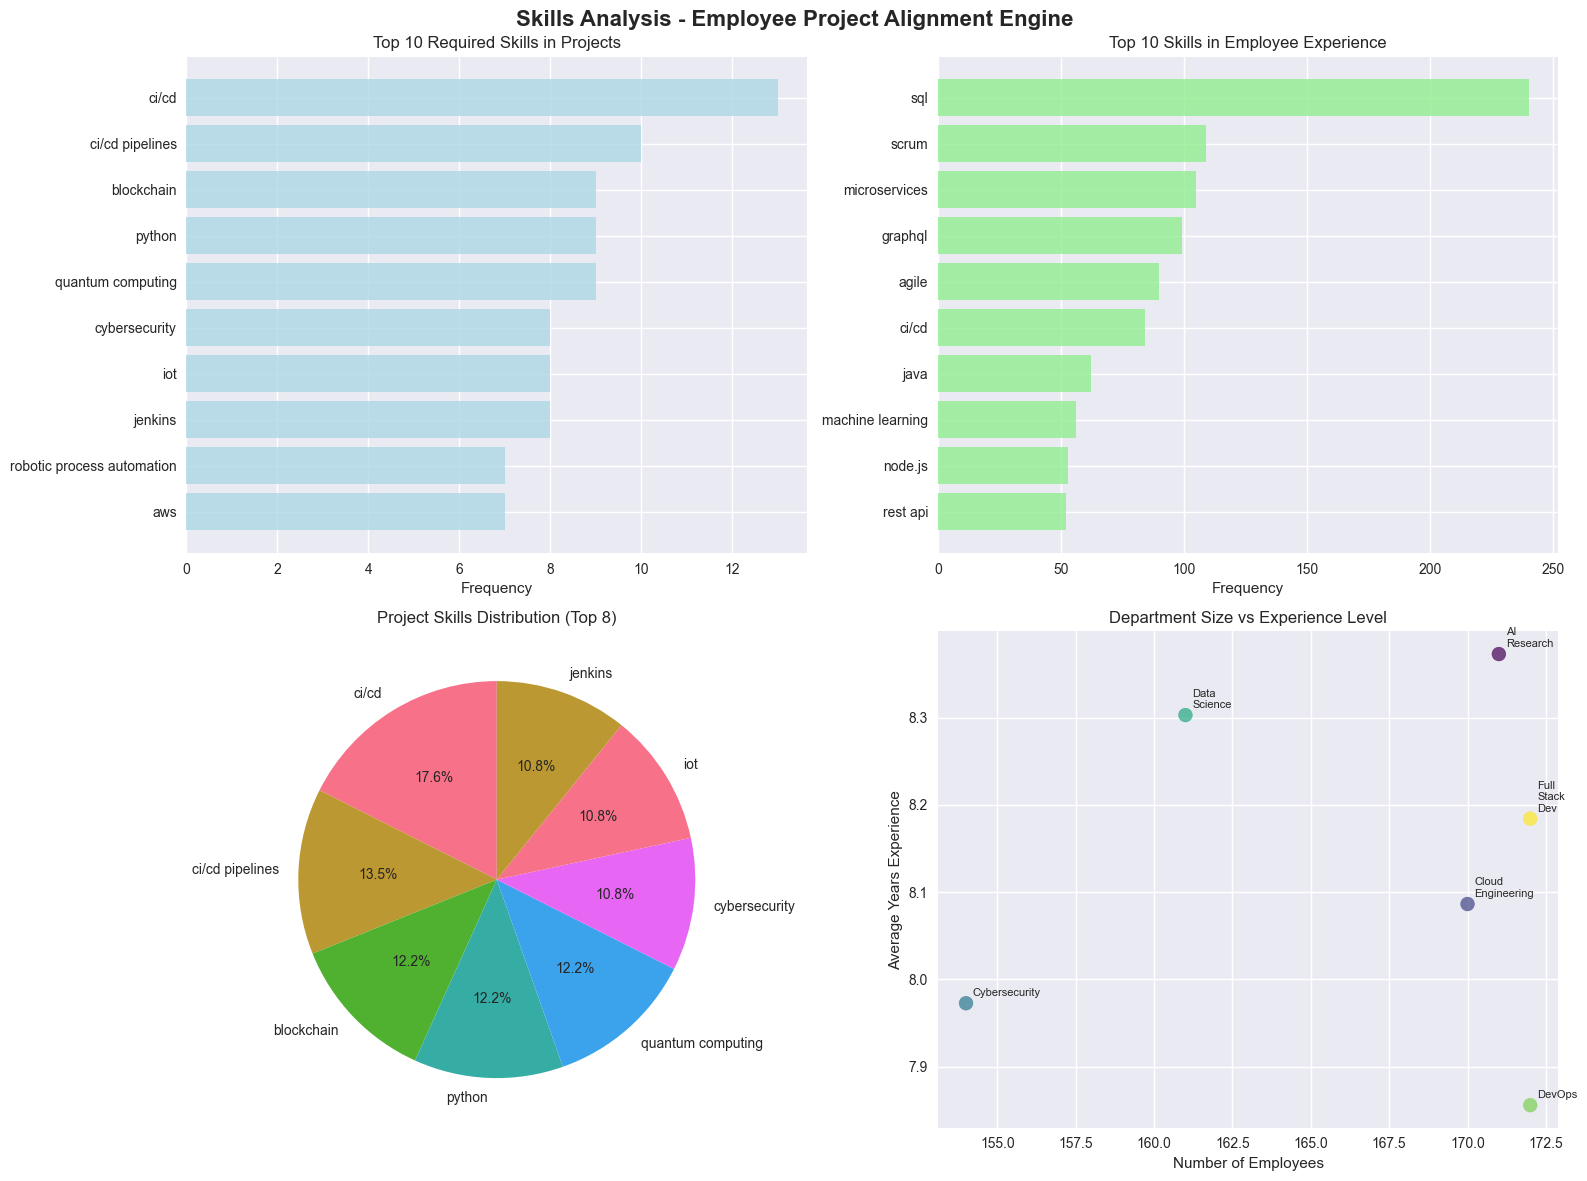

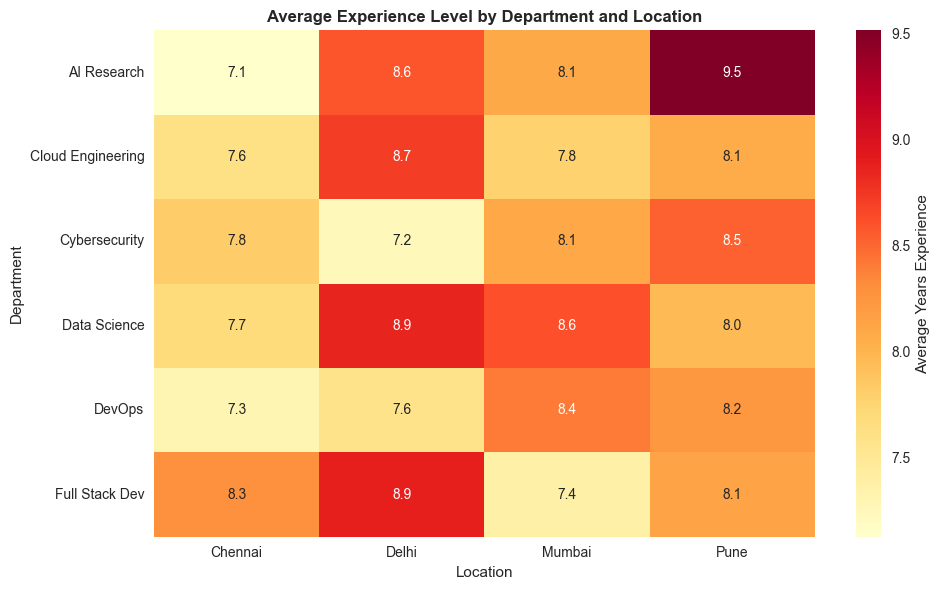


✅ Skills analysis visualizations saved to:
   - ../reports/eda_plots/skills_analysis.png
   - ../reports/eda_plots/experience_heatmap.png


In [12]:
# ================================================
# 5. Advanced Skills Analysis and Visualization
# ================================================

def extract_skills_from_projects(df):
    """Extract and analyze skills from project requirements"""
    all_skills = []
    for skills_str in df['Required_Skills'].dropna():
        skills = [skill.strip() for skill in skills_str.split(',')]
        all_skills.extend(skills)
    
    return pd.Series(all_skills).value_counts()

def extract_skills_from_experience(df):
    """Extract skills from experience text using simple keyword extraction"""
    # Common tech skills keywords for extraction
    tech_keywords = [
        'python', 'java', 'javascript', 'react', 'angular', 'vue', 'node.js',
        'sql', 'mongodb', 'postgresql', 'mysql', 'redis', 'docker', 'kubernetes',
        'aws', 'azure', 'gcp', 'jenkins', 'git', 'agile', 'scrum', 'devops',
        'machine learning', 'data science', 'tensorflow', 'pytorch', 'pandas',
        'numpy', 'scikit-learn', 'nlp', 'deep learning', 'blockchain', 'iot',
        'microservices', 'rest api', 'graphql', 'ci/cd', 'terraform', 'ansible'
    ]
    
    skill_counts = {}
    for text in df['Experience_Text']:
        text_lower = text.lower()
        for skill in tech_keywords:
            if skill in text_lower:
                skill_counts[skill] = skill_counts.get(skill, 0) + 1
    
    return pd.Series(skill_counts).sort_values(ascending=False)

def create_skills_visualizations(project_skills, experience_skills):
    """Create comprehensive skills analysis visualizations"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle("Skills Analysis - Employee Project Alignment Engine", fontsize=16, fontweight='bold')
    
    # 1. Top Project Skills
    top_project_skills = project_skills.head(10)
    axes[0, 0].barh(top_project_skills.index[::-1], top_project_skills.values[::-1], 
                    color='lightblue', alpha=0.8)
    axes[0, 0].set_title('Top 10 Required Skills in Projects')
    axes[0, 0].set_xlabel('Frequency')
    
    # 2. Top Experience Skills  
    top_exp_skills = experience_skills.head(10)
    axes[0, 1].barh(top_exp_skills.index[::-1], top_exp_skills.values[::-1], 
                    color='lightgreen', alpha=0.8)
    axes[0, 1].set_title('Top 10 Skills in Employee Experience')
    axes[0, 1].set_xlabel('Frequency')
    
    # 3. Skills Distribution (Project)
    axes[1, 0].pie(project_skills.head(8).values, labels=project_skills.head(8).index, 
                   autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Project Skills Distribution (Top 8)')
    
    # 4. Department vs Experience Analysis
    dept_exp_analysis = df_emp_clean.groupby('Department')['Years_Experience'].agg(['mean', 'count'])
    axes[1, 1].scatter(dept_exp_analysis['count'], dept_exp_analysis['mean'], 
                       s=100, alpha=0.7, c=range(len(dept_exp_analysis)), cmap='viridis')
    axes[1, 1].set_xlabel('Number of Employees')
    axes[1, 1].set_ylabel('Average Years Experience')
    axes[1, 1].set_title('Department Size vs Experience Level')
    
    # Add department labels
    for i, dept in enumerate(dept_exp_analysis.index):
        axes[1, 1].annotate(dept.replace(' ', '\n'), 
                           (dept_exp_analysis['count'].iloc[i], dept_exp_analysis['mean'].iloc[i]),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.tight_layout()
    plt.savefig('../reports/eda_plots/skills_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_advanced_experience_heatmap():
    """Create experience level heatmap by department and location"""
    # Create pivot table for heatmap
    exp_pivot = df_emp_clean.pivot_table(
        values='Years_Experience', 
        index='Department', 
        columns='Location', 
        aggfunc='mean'
    )
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(exp_pivot, annot=True, fmt='.1f', cmap='YlOrRd', 
                cbar_kws={'label': 'Average Years Experience'})
    plt.title('Average Experience Level by Department and Location', fontweight='bold')
    plt.tight_layout()
    plt.savefig('../reports/eda_plots/experience_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

# Extract skills from datasets
print("🔍 Extracting skills from datasets...")
project_skills = extract_skills_from_projects(df_proj_clean)
experience_skills = extract_skills_from_experience(df_exp_clean)

print(f"📊 Found {len(project_skills)} unique skills in projects")
print(f"📊 Found {len(experience_skills)} unique skills in experience data")

# Create skills visualizations
create_skills_visualizations(project_skills, experience_skills)
create_advanced_experience_heatmap()

print("\n✅ Skills analysis visualizations saved to:")
print("   - ../reports/eda_plots/skills_analysis.png")
print("   - ../reports/eda_plots/experience_heatmap.png")

In [13]:
# ================================================
# 6. Save Cleaned Datasets and Create Data Summary
# ================================================

def save_cleaned_datasets(df_emp, df_exp, df_proj):
    """
    Save cleaned datasets with proper organization and metadata
    """
    # Ensure processed directory exists
    os.makedirs("../data/processed", exist_ok=True)
    
    # Save cleaned datasets
    output_paths = {
        'employee_master': "../data/processed/employee_master_cleaned.csv",
        'employee_experience': "../data/processed/employee_experience_cleaned.csv",
        'client_projects': "../data/processed/client_projects_cleaned.csv"
    }
    
    try:
        df_emp.to_csv(output_paths['employee_master'], index=False)
        df_exp.to_csv(output_paths['employee_experience'], index=False)
        df_proj.to_csv(output_paths['client_projects'], index=False)
        
        print("✅ Cleaned datasets saved successfully:")
        for name, path in output_paths.items():
            print(f"   - {name}: {path}")
            
        return True
        
    except Exception as e:
        print(f"❌ Error saving datasets: {e}")
        return False

def create_data_summary_report():
    """Create a comprehensive data summary report"""
    summary = {
        'Data Cleaning Summary': {
            'Total Employees': len(df_emp_clean),
            'Total Projects': len(df_proj_clean),
            'Departments': df_emp_clean['Department'].nunique(),
            'Locations': df_emp_clean['Location'].nunique(),
            'Avg Years Experience': round(df_emp_clean['Years_Experience'].mean(), 2),
            'Experience Range': f"{df_emp_clean['Years_Experience'].min():.1f} - {df_emp_clean['Years_Experience'].max():.1f} years"
        },
        'Data Quality Metrics': {
            'Employee Missing Values': df_emp_clean.isnull().sum().sum(),
            'Experience Missing Values': df_exp_clean.isnull().sum().sum(),
            'Project Missing Values': df_proj_clean.isnull().sum().sum(),
            'Duplicate Employee IDs': df_emp_clean['Employee_ID'].duplicated().sum(),
            'Duplicate Project IDs': df_proj_clean['Project_ID'].duplicated().sum()
        }
    }
    
    print("\n📋 DATA CLEANING SUMMARY REPORT")
    print("=" * 50)
    
    for section, metrics in summary.items():
        print(f"\n{section}:")
        print("-" * 30)
        for metric, value in metrics.items():
            print(f"  {metric}: {value}")
    
    return summary

# Save cleaned datasets
save_success = save_cleaned_datasets(df_emp_clean, df_exp_clean, df_proj_clean)

if save_success:
    # Create summary report
    summary_report = create_data_summary_report()
    
    # Final validation
    print(f"\n🎯 FINAL DATA OVERVIEW:")
    print(f"   ✅ {len(df_emp_clean)} employees processed")
    print(f"   ✅ {len(df_exp_clean)} experience records processed") 
    print(f"   ✅ {len(df_proj_clean)} projects processed")
    print(f"   ✅ Data saved in ../data/processed/")
    print(f"   ✅ Visualizations saved in ../reports/eda_plots/")
    
    print("\n🚀 Ready for Feature Engineering phase!")
else:
    print("\n❌ Failed to save datasets. Please check file permissions and try again.")

✅ Cleaned datasets saved successfully:
   - employee_master: ../data/processed/employee_master_cleaned.csv
   - employee_experience: ../data/processed/employee_experience_cleaned.csv
   - client_projects: ../data/processed/client_projects_cleaned.csv

📋 DATA CLEANING SUMMARY REPORT

Data Cleaning Summary:
------------------------------
  Total Employees: 1000
  Total Projects: 100
  Departments: 6
  Locations: 4
  Avg Years Experience: 8.13
  Experience Range: 1.0 - 14.9 years

Data Quality Metrics:
------------------------------
  Employee Missing Values: 0
  Experience Missing Values: 0
  Project Missing Values: 0
  Duplicate Employee IDs: 0
  Duplicate Project IDs: 0

🎯 FINAL DATA OVERVIEW:
   ✅ 1000 employees processed
   ✅ 1000 experience records processed
   ✅ 100 projects processed
   ✅ Data saved in ../data/processed/
   ✅ Visualizations saved in ../reports/eda_plots/

🚀 Ready for Feature Engineering phase!


In [14]:
# ================================================
# 5. Save Cleaned Datasets
# ================================================
OUTPUT_EMP_PATH = "../data/processed/employee_master_cleaned.csv"
OUTPUT_EXP_PATH = "../data/processed/employee_experience_cleaned.csv"
OUTPUT_PROJ_PATH = "../data/processed/client_projects_cleaned.csv"

df_emp.to_csv(OUTPUT_EMP_PATH, index=False)
df_exp.to_csv(OUTPUT_EXP_PATH, index=False)
df_proj.to_csv(OUTPUT_PROJ_PATH, index=False)

print("✅ Cleaned datasets saved successfully to /data/processed/")


✅ Cleaned datasets saved successfully to /data/processed/
